In [3]:
# Import required libraries and dependencies
import pandas as pd
import numpy as np
import hvplot.pandas
import holoviews as hv
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [4]:
# Load the data into a Pandas DataFrame
df_market_data = pd.read_csv(
    "Resources/crypto_market_data.csv",
    index_col="coin_id")

# Display sample data
df_market_data.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [5]:
# Generate summary statistics
df_market_data.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


In [6]:
# Plot your data to see what's in your DataFrame
df_market_data.hvplot.line(
    width=800,
    height=400,
    rot=90
)

:NdOverlay   [Variable]
   :Curve   [coin_id]   (value)

---

### Prepare the Data

In [7]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

values = ["price_change_percentage_24h", "price_change_percentage_7d", "price_change_percentage_14d", "price_change_percentage_30d", "price_change_percentage_60d", "price_change_percentage_200d", "price_change_percentage_1y"]
market_data_scaled = StandardScaler().fit_transform(df_market_data[values])

market_data_scaled[0:5]

array([[ 0.50852937,  0.49319307,  0.77220043,  0.23545963, -0.0674951 ,
        -0.35595348, -0.25163688],
       [ 0.18544589,  0.93444504,  0.55869212, -0.05434093, -0.27348273,
        -0.11575947, -0.19935211],
       [ 0.02177396, -0.70633685, -0.02168042, -0.06103015,  0.00800452,
        -0.55024692, -0.28206051],
       [-0.04076438, -0.81092807,  0.24945797, -0.05038797, -0.37316402,
        -0.45825882, -0.29554614],
       [ 1.19303608,  2.00095907,  1.76061001,  0.54584206, -0.29120287,
        -0.49984776, -0.27031695]])

In [8]:
# Create a DataFrame with the scaled data

df_market_data_scaled = pd.DataFrame(
    market_data_scaled,
    columns=[values]
)

# Copy the crypto names from the original data
df_market_data_scaled['coin_id'] = df_market_data.index


In [9]:

# Set the coinid column as index
df_market_data_scaled.set_index('coin_id', inplace=True)




In [10]:

# Display sample data
df_market_data_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
"(bitcoin,)",0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
"(ethereum,)",0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
"(tether,)",0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
"(ripple,)",-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
"(bitcoin-cash,)",1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


---

### Find the Best Value for k Using the Original Data.

In [11]:
# Create a list with the number of k-values from 1 to 11
k = list(range(1,11))

In [12]:
# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k

for i in k:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(df_market_data_scaled)
    inertia.append(k_model.inertia_)
    


/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

In [13]:
# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()


,k,inertia
0,1,287.000000
1,2,195.820218
2,3,123.190482
3,4,79.022435
4,5,65.302379


In [14]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

elbow_plot = df_elbow.hvplot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve", 
    xticks=df_elbow['k'].values
)

display(elbow_plot)

:Curve   [k]   (inertia)

#### Answer the following question: 

**Question:** What is the best value for `k`?

**Answer: 4

---

### Cluster Cryptocurrencies with K-means Using the Original Data

In [15]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, random_state=2)


In [16]:
# Fit the K-Means model using the scaled data
model.fit(df_market_data_scaled)

/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=2)

In [17]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_3 = model.predict(df_market_data_scaled)

# Print the resulting array of cluster values.
print(k_3)

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 2 0 1 1 3
 1 1 1 1]


In [18]:
# Create a copy of the DataFrame
market_data_predictions_df = df_market_data_scaled.copy()

In [19]:
# Add a new column to the DataFrame with the predicted clusters
market_data_predictions_df['cluster_predictions'] = k_3

# Display sample data
market_data_predictions_df

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,cluster_predictions
coin_id,,,,,,,,
"(bitcoin,)",0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
"(ethereum,)",0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
"(tether,)",0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
"(ripple,)",-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
"(bitcoin-cash,)",1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
"(binancecoin,)",0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
"(chainlink,)",0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
"(cardano,)",0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
"(litecoin,)",0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [20]:

market_data_predictions_df['cluster_predictions'] = market_data_predictions_df['cluster_predictions'].astype(int)

In [21]:
market_data_predictions_df.dtypes

price_change_percentage_24h     float64
price_change_percentage_7d      float64
price_change_percentage_14d     float64
price_change_percentage_30d     float64
price_change_percentage_60d     float64
price_change_percentage_200d    float64
price_change_percentage_1y      float64
cluster_predictions               int64
dtype: object

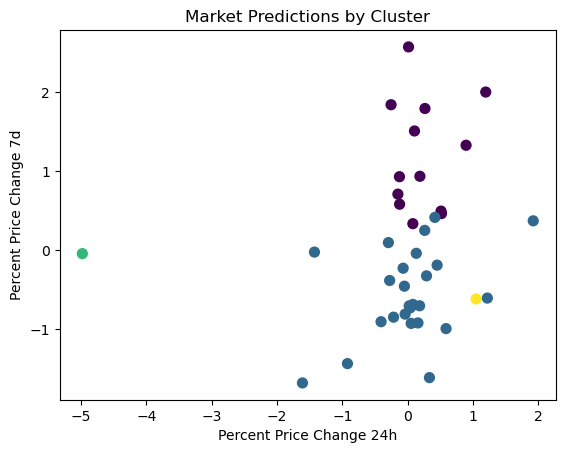

In [22]:
# Create a scatter plot using pyPlot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`. 
# Color the graph points with the labels found using K-Means and 
# the cryptocurrency represented by each data point.

x = market_data_predictions_df['price_change_percentage_24h']
y = market_data_predictions_df['price_change_percentage_7d']
index = market_data_predictions_df.index

color_column = market_data_predictions_df['cluster_predictions']

plt.scatter(x, y, s=50, c=color_column)
plt.title('Market Predictions by Cluster')
plt.xlabel('Percent Price Change 24h')
plt.ylabel('Percent Price Change 7d')
plt.show()

---

### Optimize Clusters with Principal Component Analysis.

In [23]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [24]:
# Use the PCA model with `fit_transform` to reduce to 
# three principal components.

predictions_transformed = pca.fit_transform(market_data_predictions_df)

# View the first five rows of the DataFrame. 
predictions_transformed_df = pd.DataFrame(predictions_transformed, columns=['PC1', 'PC2', 'PC3'])
predictions_transformed_df.head()

,PC1,PC2,PC3
0,-0.822587,0.832706,0.566554
1,-0.709903,0.454212,1.056402
2,-0.307900,-0.184609,-0.740820
3,-0.353704,-0.239815,-0.596141
4,-1.484966,2.018485,1.787011


In [25]:
# Retrieve the explained variance to determine how much information 
# can be attributed to each principal component.
explained_variance = pca.explained_variance_ratio_
explained_variance

total_variance_explained = sum(explained_variance)
total_variance_explained

0.8881101751527737

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 0.8881101751527737

In [26]:
# Create a new DataFrame with the PCA data.

predictions_transformed_df.head()

# Copy the crypto names from the original data

predictions_transformed_df['crypto_names'] = index


In [27]:
# Set the coinid column as index

predictions_transformed_df.set_index('crypto_names', inplace=True)

In [28]:

# Display sample data
predictions_transformed_df.head()

,PC1,PC2,PC3
crypto_names,,,
"(bitcoin,)",-0.822587,0.832706,0.566554
"(ethereum,)",-0.709903,0.454212,1.056402
"(tether,)",-0.307900,-0.184609,-0.740820
"(ripple,)",-0.353704,-0.239815,-0.596141
"(bitcoin-cash,)",-1.484966,2.018485,1.787011


---

### Find the Best Value for k Using the PCA Data

In [29]:
# Create a list with the number of k-values from 1 to 11
k2 = list(range(1,11))

In [30]:
# Create an empty list to store the inertia values
# Create an empty list to store the inertia values
inertia2 = []

# Create a for loop to compute the inertia with each possible value of k
# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using `df_market_data_pca`
# 3. Append the model.inertia_ to the inertia list

for i in k2:
    k_model = KMeans(n_clusters=i, random_state=0)
    k_model.fit(predictions_transformed_df)
    inertia2.append(k_model.inertia_)




/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` expl

In [31]:
# Create a dictionary with the data to plot the Elbow curve
# Create a dictionary with the data to plot the Elbow curve
elbow_2 = {"k": k2, "inertia": inertia2}
df_elbow2 = pd.DataFrame(elbow_2)

# Review the DataFrame
df_elbow2.head()


,k,inertia
0,1,268.707481
1,2,172.813447
2,3,98.899905
3,4,46.685148
4,5,36.520758


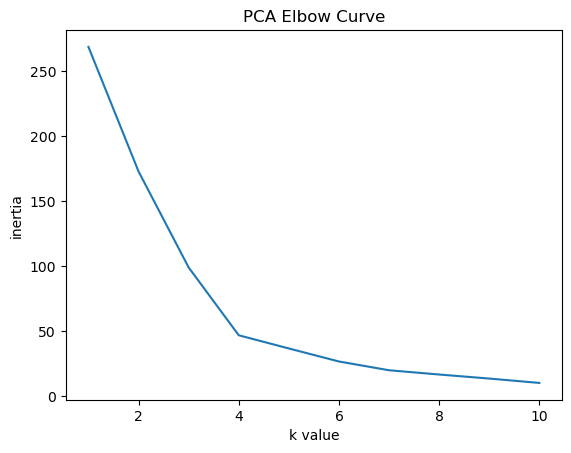

In [32]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

plt.plot(df_elbow2['k'], df_elbow2['inertia'])
plt.title('PCA Elbow Curve')
plt.xlabel('k value')
plt.ylabel('inertia')
plt.show()

#### Answer the following questions: 

* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** No

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [58]:
# Initialize the K-Means model using the best value for k
model2 = KMeans(n_clusters=4)

In [59]:
model2.fit(predictions_transformed_df)

/Users/jesserinskeys/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [60]:
# Predict the clusters to group the cryptocurrencies using the PCA data

clusters = model2.predict(predictions_transformed_df)

# Print the resulting array of cluster values.
print(clusters)

[3 3 0 0 3 3 3 3 3 0 0 0 0 3 0 3 0 0 3 0 0 3 0 0 0 0 0 0 3 0 0 0 1 3 0 0 2
 0 0 0 0]


In [64]:
# Create a copy of the DataFrame with the PCA data
pca_df = predictions_transformed_df.copy()

# Add a new column to the DataFrame with the predicted clusters
pca_df['Cluster'] = clusters

# Display sample data
pca_df.head()

,PC1,PC2,PC3,Cluster
crypto_names,,,,
"(bitcoin,)",-0.822587,0.832706,0.566554,3
"(ethereum,)",-0.709903,0.454212,1.056402,3
"(tether,)",-0.307900,-0.184609,-0.740820,0
"(ripple,)",-0.353704,-0.239815,-0.596141,0
"(bitcoin-cash,)",-1.484966,2.018485,1.787011,3


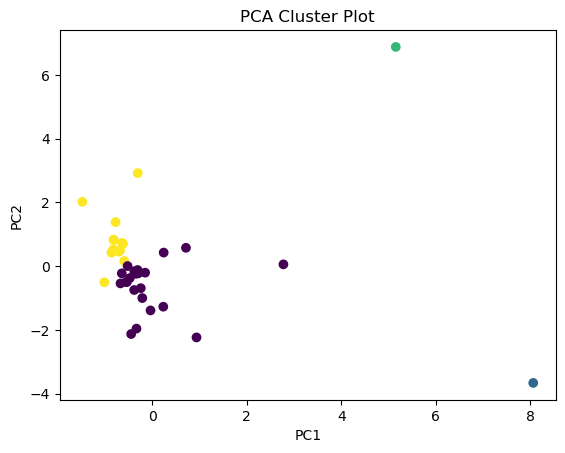

In [65]:
# Create a scatter plot using hvPlot by setting 
# `x="PC1"` and `y="PC2"`. 
# Color the graph points with the labels found using K-Means and 
# add the crypto name in the `hover_cols` parameter to identify 
# the cryptocurrency represented by each data point.

colors = pca_df['Cluster']

plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors)
plt.title('PCA Cluster Plot')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



### Visualize and Compare the Results

In this section, you will visually analyze the cluster analysis results by contrasting the outcome with and without using the optimization techniques.

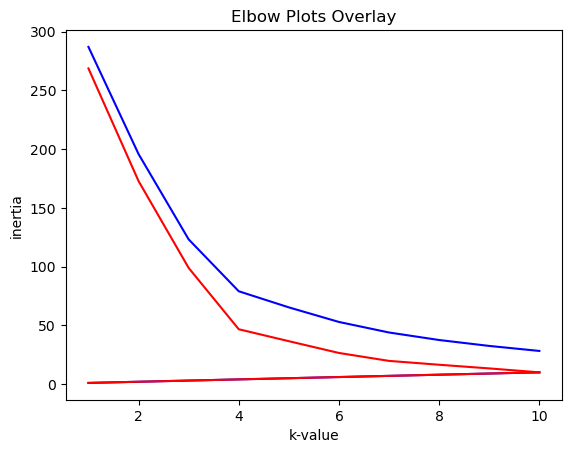

In [66]:
# Composite plot to contrast the Elbow curves

x = k
y1 = df_elbow
y2 = df_elbow2

plt.plot(x, y1, color='blue')
plt.plot(x, y2, color='red')
plt.xlabel('k-value')
plt.ylabel('inertia')
plt.title('Elbow Plots Overlay')

plt.show()

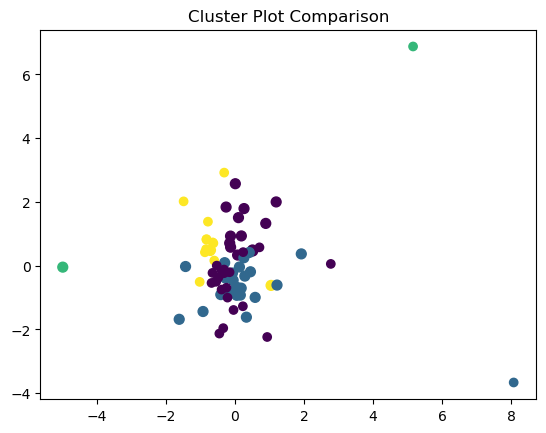

In [67]:
# Composite plot to contrast the clusters
colors = pca_df['Cluster']



x = market_data_predictions_df['price_change_percentage_24h']
y = market_data_predictions_df['price_change_percentage_7d']
index = market_data_predictions_df.index

color_column = market_data_predictions_df['cluster_predictions']

plt.scatter(x, y, s=50, c=color_column)
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=colors)
plt.title('Cluster Plot Comparison')

plt.show()




#### Answer the following question: 

  * **Question:** After visually analyzing the cluster analysis results, what is the impact of using fewer features to cluster the data using K-Means?

  * **Answer:** We can conclude that we can use less features and get a similar performance to the original model and can still clearly identify four clusters.